## 代码复现

#### 理解语法树的概念

In [1]:
# 导入必要的包
import random
random.seed(123456789)

In [2]:
# 定义语法结构
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*                  
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [3]:
print(simple_grammar)     # 打印字符串


sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*                  
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的



In [4]:
# 根据语法结构定义函数
def adj():
    # 定义adjectives规则
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]
def verb():
    return random.choice(" 看着   |  坐在 |  听着 | 看见".split("|")).split()[0]
def noun():
    return random.choice("   女人 |  篮球 | 桌子 | 小猫".split("|")).split()[0]
def Article():
    return random.choice(" 一个 | 这个".split("|")).split()[0]
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [5]:
def noun_phrase():
    return Article() + adj_star() + noun()

In [6]:
def verb_phrase():
    return verb() + noun_phrase()

In [7]:
def sentence():
    return noun_phrase() + verb_phrase()

In [8]:
sentence()  # 

'这个好看的好看的好看的小小的女人听着一个篮球'

### 问题在于如果每次更换语法之后，不光需要修改语法树，同时也需要修改对应的函数输出

In [9]:
# 希望设计一个程序可以自动提取出语法树中的信息
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [10]:
def create_grammar(grammar_str, split='=>', line_split='\n'):   
    """提取语法树结构，并保存至字典中"""
    grammar = {}
    for line in grammar_str.split(line_split):     # 依次处理语法树的每一行
        if not line.strip(): continue              # 空行跳过
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [11]:
grammar = create_grammar(adj_grammar)

In [12]:
print(grammar)

{'Adj*': [['null'], ['Adj', 'Adj*']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}


In [13]:
def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression #1
    expaned = [generate(gram, t) for t in random.choice(gram[target])]  #2
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null']) #3

In [14]:
# 展开分析
def generate_another(gram, target):
    if target not in gram:
        return target
    expaed = []
    for t in random.choice(gram[target]):
        expaed.append(generate_another(gram, t))
    return ''.join([e if e != '/n' else '\n' for e in expaed if e != 'null'])

#### 每次独立运行两个代码，输出结果一样，一起运行结果不一定一样，因为随机数种子每次独立运行时是一样的

In [15]:
random.seed(456)
print(generate(gram=grammar, target='Adj*'))
random.seed(456)
print(generate_another(gram=grammar, target='Adj*'))

好看的好看的
好看的好看的


#### 如上所示，每次运行前设置随机数种子结果则一样

In [16]:
example_grammar = create_grammar(simple_grammar)   # 生成句子语法

In [17]:
generate(gram=example_grammar, target='sentence')

'这个女人看见这个篮球'

#### 生成多句语句

In [18]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [19]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))

小朋友,您好我是9号,请问你要赌博吗？
女士,你好我是65号,请问你要赌博吗？
先生,您好我是4号,您需要打牌吗？
女士,您好我是1号,请问你要打猎吗？
女士,你好我是545号,请问你要赌博吗？
先生,你好我是71号,您需要喝酒吗？
先生,你好我是3851号,您需要打牌吗？
你好我是22号,请问你要打猎吗？
先生,你好我是7号,请问你要喝酒吗？
女士,你好我是3号,您需要赌博吗？
小朋友,您好我是1号,您需要赌博吗？
小朋友,您好我是91号,您需要打猎吗？
你好我是6号,请问你要打牌吗？
您好我是6号,您需要喝酒吗？
小朋友,你好我是571178号,请问你要喝酒吗？
您好我是5号,您需要赌博吗？
您好我是82号,请问你要喝酒吗？
您好我是1号,请问你要喝酒吗？
你好我是92776号,请问你要喝酒吗？
你好我是3号,您需要打猎吗？


#### 生成的20句话中，有不合理的地方，比如对小朋友来说怎么能喝酒赌博呢？
#### 因此希望生成的语句能够符合常理

# Language Model

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ how- to- get- Pr(w1 | w2 w3 w4) ? $$

In [20]:
# 加载数据集目录
import os
dataset_name = "sqlResult_1558435.csv"
dataset_path = os.path.abspath(os.path.join(os.getcwd(), "./dataset"))
dataset_abs_path = os.path.join(dataset_path, dataset_name)

In [21]:
import re
import random
import jieba               # 中文需要分词
import pandas as pd
import numpy as np
from collections import Counter
from functools import reduce
from operator import add, mul
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data_src = pd.read_csv(dataset_abs_path, encoding='gb18030')   # 记载数据集
data_src.head(1)   # 查看数据集情况

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm


In [23]:
articles = data_src["content"].tolist() # 提取数据集中"content"内容
len(articles)   # 

89611

In [24]:
def token(string):
    # 匹配单词字符，即a-z,A-Z,0-9,_
    return re.findall("\w+", string)

In [25]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\qq751\AppData\Local\Temp\jieba.cache
Loading model cost 0.525 seconds.
Prefix dict has been built successfully.


In [26]:
with_jieba_cut.most_common()[:10]     

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

#### 出现了较多的换行等标点符号，考虑去除

In [27]:
articles_clean = [''.join(token(str(a)))for a in articles]   # 遍历文章内容,token函数实现单词字符的提取

In [28]:
# 保存处理好之后的文本
data_article_9k = os.path.join(dataset_path, 'article_9k.txt')
with open(data_article_9k, 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [29]:
def cut(string): 
    return list(jieba.cut(string))

In [30]:
TOKEN = []

In [31]:
for i, line in enumerate((open(data_article_9k))):
    if i % 8000 == 0:  # 每5000次输出一次
        print(i) 
    TOKEN += cut(line)

0
8000
16000
24000
32000
40000
48000
56000
64000
72000
80000
88000


In [32]:
print(TOKEN[0:20])

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机', '6', '等', '15', '款', '机型', '外', '其余', '机型', '已', '暂停']


In [33]:
# 此时已经所有的文章进行了分词，并保存在了TOKEN列表中
words_count = Counter(TOKEN)  # 单词统计

In [34]:
words_count.most_common(10)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909)]

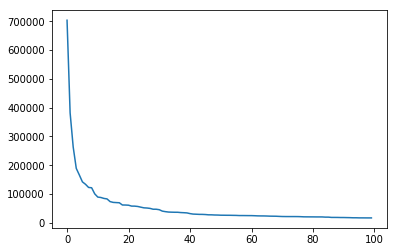

In [35]:
frequiences = [f for w, f in words_count.most_common(100)]   # 计算出频率
x = [i for i in range(100)]
plt.plot(x, frequiences)           # 绘制次数

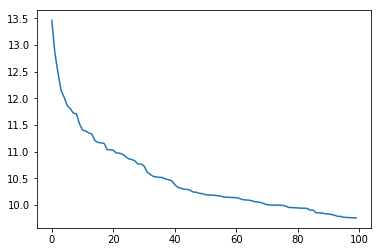

In [36]:
plt.plot(x, np.log(frequiences))   # 绘制频率

In [37]:
words_number = len(TOKEN)    # 统计所有的文本数量
def prob_1(word):
    return words_count[word] / words_number   # 返回word的统计频率

In [38]:
prob_1('我们')

0.0011341645999654677

In [39]:
TOKEN = [str(t) for t in TOKEN]
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [40]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [41]:
# 计算概率 
def prob_2(word1, word2):  # p(w1,w2) = count(w1,2)/count(w1)
    if word1 + word2 in words_count_2: 
        return words_count_2[word1+word2] / words_count[word1]
    else:
        return 1 / len(TOKEN_2_GRAM)

#### 说明:  这里计算的是如下的概率:
##### 如: “我们”  “在” “吃饭”
##### 这里计算的是P(w2|w1) = P(w1+w2)/P(w1)  也就是在单词1出现的情况下，单词2出现的概率，前后的顺序不能变，即我们在前   在是第二个词

In [42]:
prob_2('我们', '在')

0.026924231808627765

In [43]:
prob_2('在', '我们')

0.0008535757235476883

#### 如上所示，“我们在”和“在我们”的概率是不一样的，顺序一定不能乱

In [44]:
# 不计算P(w1)
def get_probablity(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word, next_)  # p(w1|w2)
        sentence_pro *= probability  # p(s) = p(w_1)p(w2|w1)*p(w3|w2)..p(wn|wn-1) 
#         if i == 0:
#             sentence_pro *= prob_1(word)
    return sentence_pro

In [45]:
# 同时计算P(w1)
def get_probablity_first(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word, next_)  # p(w1|w2)
        sentence_pro *= probability  # p(s) = p(w_1)p(w2|w1)*p(w3|w2)..p(wn|wn-1) 
        if i == 0:
            sentence_pro *= prob_1(word)
    return sentence_pro

In [46]:
prob_1_result, prob_2_result= prob_1("我"), prob_2("我", "在")

In [47]:
print(prob_1_result, prob_2_result, prob_1_result*prob_2_result)

0.0012452993355641258 0.02283500455788514 2.843641600353815e-05


In [48]:
get_probablity('我在')

0.02283500455788514

In [49]:
get_probablity_first('我在')

2.843641600353815e-05

#### 计算首个单词的概率之后，输出句子的数据集概率变得很小,而且一般来说首字的概率对句子的整体概率影响应该不能占较大比重的，因为我们考虑的是句子的语法是不是合法，而每个句子的首单词如果对句子概率产生较大影响则会影响对句子合法性的判断。

In [50]:
get_probablity('小明今天抽奖抽到一台苹果手机')

2.403382604930677e-38

In [51]:
get_probablity('小明今天抽奖抽到一架波音飞机')

1.2800211202700063e-32

In [52]:
get_probablity('洋葱奶昔来一杯')

2.9960200751722155e-19

In [53]:
get_probablity('养乐多绿来一杯')

3.2216203868326836e-15

In [54]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 一个蓝色的桌子看着一个桌子 with Prb: 1.0839916805980949e-29
sentence: 这个蓝色的桌子听着一个篮球 with Prb: 2.0955079293424276e-25
sentence: 一个篮球看着这个桌子 with Prb: 3.518354922654436e-21
sentence: 这个女人坐在这个篮球 with Prb: 1.2137893932118814e-21
sentence: 这个小小的小猫看见一个小小的小猫 with Prb: 2.6951911451546542e-30
sentence: 一个小小的篮球看着这个蓝色的桌子 with Prb: 1.4419512407651637e-29
sentence: 这个好看的女人看见这个好看的好看的小小的蓝色的小小的蓝色的桌子 with Prb: 1.4385698458086486e-58
sentence: 一个蓝色的篮球坐在这个蓝色的篮球 with Prb: 2.702275995525225e-29
sentence: 一个好看的桌子坐在一个小小的女人 with Prb: 7.204002522012076e-30
sentence: 这个小小的好看的小小的好看的蓝色的好看的蓝色的小猫看着这个好看的蓝色的蓝色的小小的好看的好看的小小的女人 with Prb: 7.465021903742484e-106


In [55]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 9.110813006260722e-49
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 6.945364308314503e-49
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.4566485294633468e-27
---- 真是一只好看的小猫 with probility 2.5663600867514666e-20
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 5.119006132382979e-12
---- 今晚火锅去吃我 with probility 8.88408505400474e-21
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 2.9960200751722155e-19
---- 养乐多绿来一杯 with probility 3.2216203868326836e-15
